In [4]:
# %matplotlib inline
from random import *
from matplotlib.pyplot import *
from math import *
from numpy import *
import numpy.random as rd
from scipy.misc import *
from scipy.special import *
from scipy.stats import *
from scipy.linalg import *
from pylab import *
from sympy.solvers import solve
from sympy import Symbol

#from scipy import *

In [51]:
def marche(a,b,n):
    if a>1 or a<0 or b<1/2 or b>1 :
        return "Mauvais paramètres"
    else:
        tabAlphaPlus=[0]*n
        tabAlphaMoins=[0]*n
        #alpha=0
        X=[0]*n
        X[0]=0
        for i in range(n):
            zplus=rd.uniform(0,1)
            zmoins=rd.uniform(0,1)
            if zplus<a :
                tabAlphaPlus[i]=b
            else :
                tabAlphaPlus[i]=1-b
            if zmoins<a :
                tabAlphaMoins[i]=b
            else:
                tabAlphaMoins[i]=1-b
        for j in range(1,n):    
            z2=rd.uniform(0,1)
            if X[j-1]>=0:
                if z2<tabAlphaPlus[X[j-1]] :
                    X[j]=X[j-1]+1
                else :
                    X[j]=X[j-1]-1
            else :
                if z2<tabAlphaMoins[-X[j-1]] :
                    X[j]=X[j-1]+1
                else :
                    X[j]=X[j-1]-1
    #print("Alpha+:"+str(tabAlphaPlus))
    #print("Alpha-:"+str(tabAlphaMoins))
    #print("X:"+str(X))
    return X
    

        

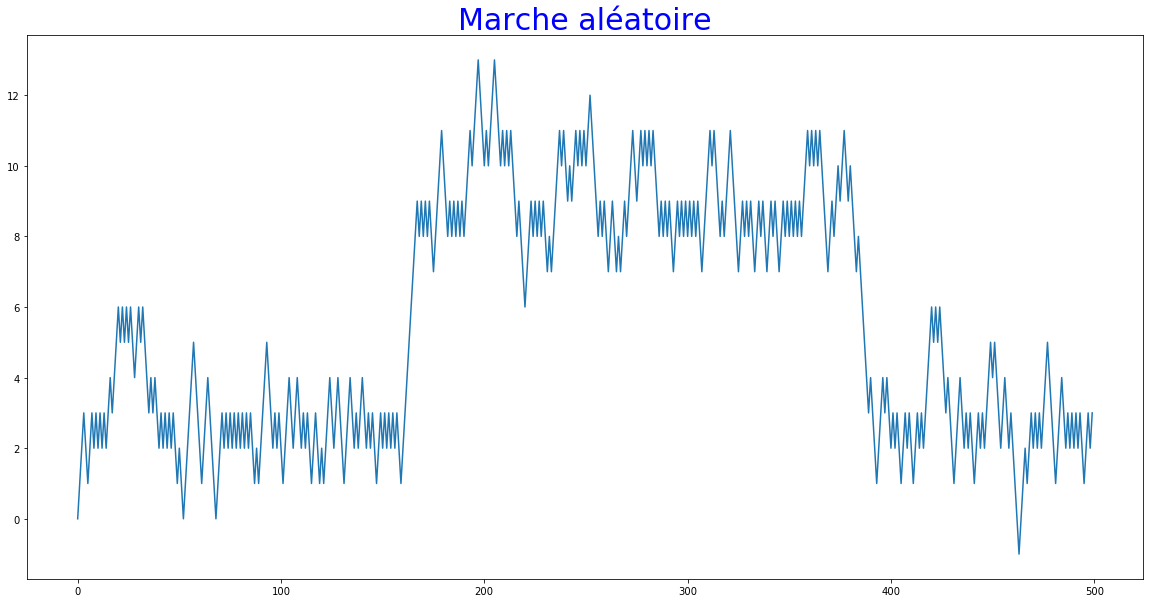

In [53]:
#a = 1/2
def plot_marche(a,b,n):
    Y=np.array(marche(a,b,n))
    X=np.array([i for i in range(n)])
    figure(figsize=(20,10))
    plt.plot(X,Y)
    title('Marche aléatoire', fontsize =30, color="blue")
    plt.show()
    

plot_marche(1/2,3/4,500)

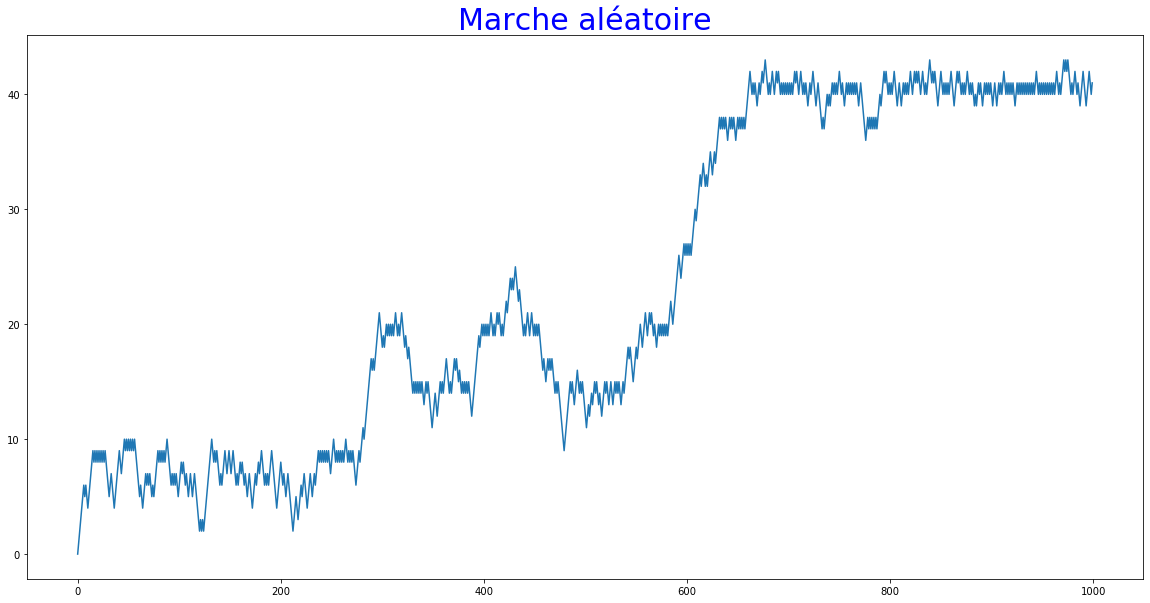

In [54]:
#a > 1/2
#On s'interesse qu cas eta < 0 donc a > 1/2

#X_n_alpha croit

def plot_marche(a,b,n):
    Y=np.array(marche(a,b,n))
    X=np.array([i for i in range(n)])
    figure(figsize=(20,10))
    plt.plot(X,Y)
    title('Marche aléatoire', fontsize =30, color="blue")
    plt.show()

plot_marche(2/3,3/4,1000)

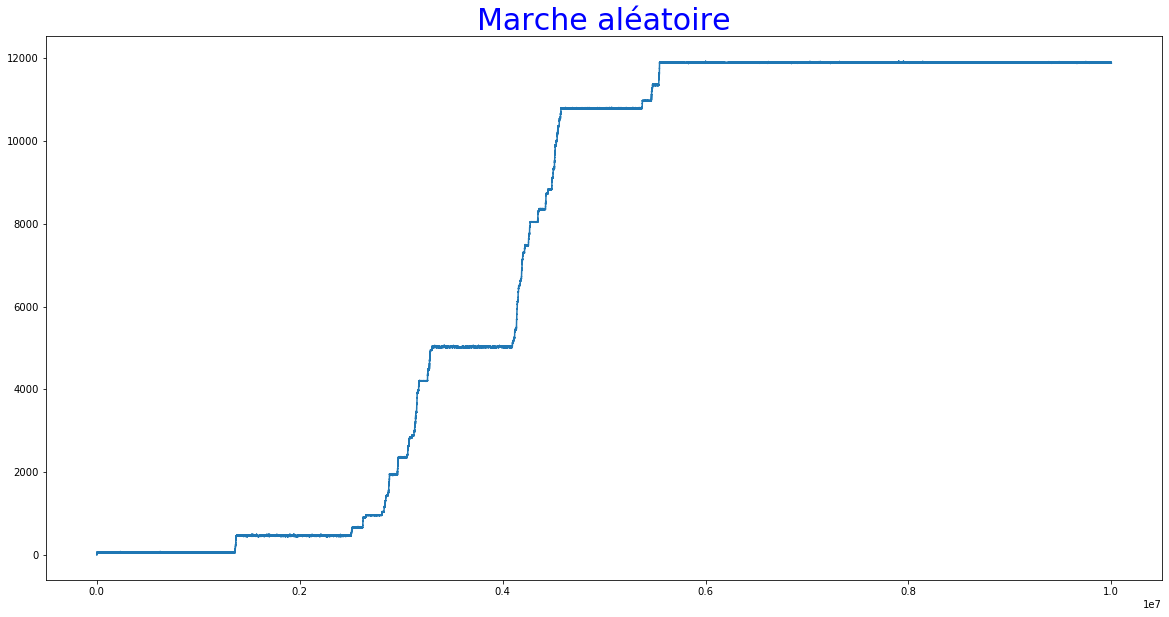

In [55]:
#a > 1/2
#On s'interesse qu cas eta < 0 donc a > 1/2
#X_n_alpha tend vers +infini

def plot_marche(a,b,n):
    Y=np.array(marche(a,b,n))
    X=np.array([i for i in range(n)])
    figure(figsize=(20,10))
    plt.plot(X,Y)
    title('Marche aléatoire', fontsize =30, color="blue")
    plt.show()
    
    
    

plot_marche(2/3,3/4,10000000)



In [56]:
def marche_xn_alpha_sur_n(a,b,n):
    if a>1 or a<0 or b<1/2 or b>1 :
        return "Mauvais paramètres"
    else:
        tabAlphaPlus=[0]*n
        tabAlphaMoins=[0]*n
        #alpha=0
        X=[0]*n
        XsurN=[0]*n
        X[0]=0
        for i in range(n):
            zplus=rd.uniform(0,1)
            zmoins=rd.uniform(0,1)
            if zplus<a :
                tabAlphaPlus[i]=b
            else :
                tabAlphaPlus[i]=1-b
            if zmoins<a :
                tabAlphaMoins[i]=b
            else:
                tabAlphaMoins[i]=1-b
        for j in range(1,n):    
            z2=rd.uniform(0,1)
            if X[j-1]>=0:
                if z2<tabAlphaPlus[X[j-1]] :
                    XsurN[j]=(X[j-1]+1)/j
                    X[j]=(X[j-1]+1)
                else :
                    XsurN[j]=(X[j-1]-1)/j
                    X[j]=(X[j-1]-1)
            else :
                if z2<tabAlphaMoins[-1*X[j-1]] :
                    XsurN[j]=(X[j-1]+1)/j
                    X[j]=(X[j-1]+1)
                else :
                    XsurN[j]=(X[j-1]-1)/j
                    X[j]=(X[j-1]-1)
    #print("Alpha+:"+str(tabAlphaPlus))
    #print("Alpha-:"+str(tabAlphaMoins))
    #print("X:"+str(X))
    return XsurN
    

        

    
    

Espérance : 1.2222222222222223
Valeur de m: -0.10000000000000003
Y:2.6305260789105215e-06


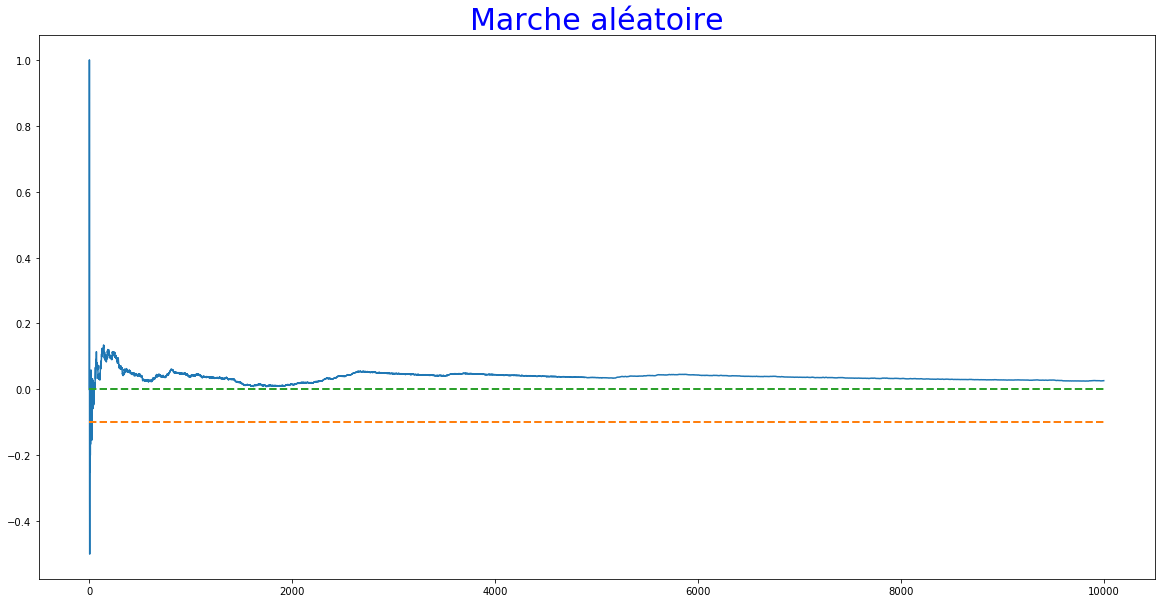

In [57]:
#a > 1/2
#On s'interesse qu cas eta < 0 donc a > 1/2
#Etudions la limite X_n_alpha/n

def plot_marche_xn_sur_n(a,b,n):
    es_ro = (a*(1-2*b)+b*b)/(b*(1-b))
    m= (1-es_ro)/(1+es_ro)
    
    print("Espérance : "+str(es_ro))
    print("Valeur de m: "+str(m))
    Y=np.array(marche_xn_alpha_sur_n(a,b,n))
    

    X=np.array([i for i in range(n)])
    figure(figsize=(20,10))
    
    plt.plot(Y)
    print("Y:"+str(Y[n-1]/(n-1)))
    plt.plot([0,n],[m,m],linestyle="--",linewidth=2)
    plt.plot([0,n],[0,0],linestyle="--",linewidth=2)
    title('Marche aléatoire', fontsize =30, color="blue")
    plt.show()

plot_marche_xn_sur_n(2/3,3/4,10000)

Espérance : 0.8750000000000001
Valeur de m: 0.06666666666666661
Y:4.990998149719962e-06


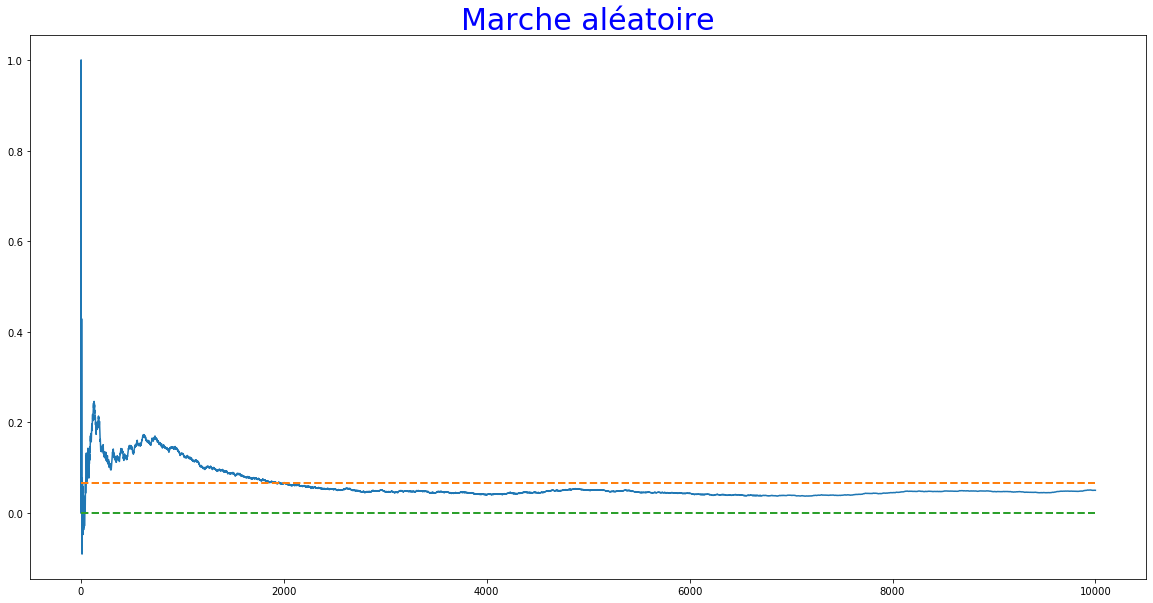

In [58]:


plot_marche_xn_sur_n(3/4,2/3,10000)

In [59]:
def solvek(a,b):
    k=Symbol('k')
    k1=solve(((((1-b)/b)**k)*a+(1-a)*(b/(1-b))**k)-1,k)
    return k1

solvek(7/8,2/3)

[0.0, 2.80735492205760]

In [87]:
def tlc(a,b,n,N):
    if a>1 or a<0 or b<1/2 or b>1 :
        return "Mauvais paramètres"
    else:
        tab=[]
        es_ro = (a*(1-2*b)+b*b)/(b*(1-b))
        m= (1-es_ro)/(1+es_ro)
        tabAlphaPlus=[0]*n
        tabAlphaMoins=[0]*n
        k=solvek(a,b)
        #alpha=0
        X=[0]*n
        X[0]=0
        for i in range(n):
            zplus=rd.uniform(0,1)
            zmoins=rd.uniform(0,1)
            if zplus<a :
                tabAlphaPlus[i]=b
            else :
                tabAlphaPlus[i]=1-b
            if zmoins<a :
                tabAlphaMoins[i]=b
            else:
                tabAlphaMoins[i]=1-b
        for l in range(N):
            for j in range(1,n):    
                z2=rd.uniform(0,1)
                if X[j-1]>=0:
                    if z2<tabAlphaPlus[X[j-1]] :
                        X[j]=X[j-1]+1
                        tab.append(sqrt(j)*((X[j]/j)-m))
                    else :
                        X[j]=X[j-1]-1
                        tab.append(sqrt(j)*((X[j]/j)-m))
                else :
                    if z2<tabAlphaMoins[-X[j-1]] :
                        X[j]=X[j-1]+1
                        tab.append(sqrt(j)*((X[j]/j)-m))
                    else :
                        X[j]=X[j-1]-1
                        tab.append(sqrt(j)*((X[j]/j)-m))
        return tab

tlc(7/8,2/3,100,1000)

[0.8148148148148149,
 -0.2618914004394621,
 -0.8981004187394177,
 -0.37037037037037035,
 -0.861300257999919,
 -0.4536092116265144,
 -0.11198947348421548,
 0.18332398030762348,
 -0.2222222222222222,
 0.046848557928420506,
 0.2903442577415501,
 0.5132002392796673,
 0.7190558099215933,
 0.9106679354052979,
 1.0901730900435693,
 1.2592592592592593,
 0.9342112964362455,
 1.0999438818457405,
 1.2575380967719683,
 1.4078946524998677,
 1.5517716639003905,
 1.2634116524776915,
 0.9885127777520581,
 0.725774738602423,
 0.874074074074074,
 0.6246662082179196,
 0.769800358919501,
 0.9099144720592509,
 1.0453959778856252,
 0.8114408259335794,
 0.9445908476963718,
 1.0737547418017945,
 1.1992016299170296,
 1.3211742855422903,
 1.439892433981917,
 1.5555555555555554,
 1.6683452785802926,
 1.7784274316557669,
 1.8859538114821375,
 1.6748359459410307,
 1.4691902044335532,
 1.5773231329458284,
 1.3781352281909458,
 1.1837112046386278,
 0.9938079899999065,
 1.1030842645662675,
 1.2101391887232735,
 1.026

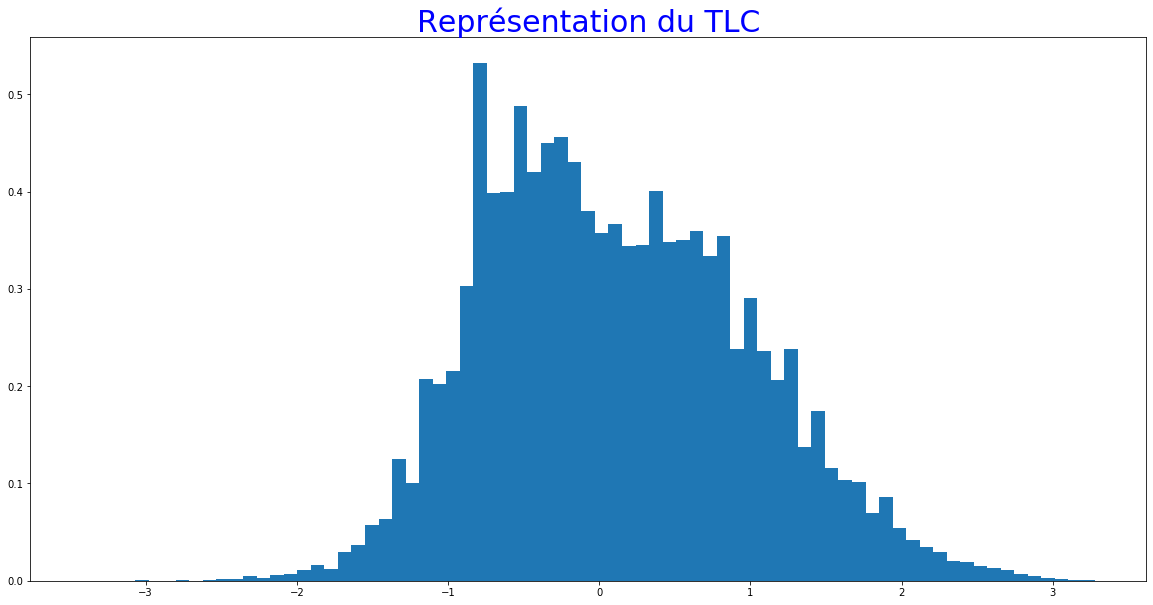

In [93]:
def plotTLC(a,b,n,N):
    k=solvek(a,b)
    if k[1]<=2 and k[0]<=2:
        return "k doit être supérieur à 2 pour observer une convergence, or ici : k1 = "+str(k[0])+" et k2 = "+str(k[1])
    else:
        tab=tlc(a,b,n,N)
        figure(figsize=(20,10))
        plt.hist(tab,bins=75,density=True)
        title('Représentation du TLC',fontsize=30,color="blue")
    
plotTLC(5/6,2/3,100,1000)